2.2

In [ ]:
import pandas as pd
import numpy as np

# Cargar el dataset
file_path_csv = "casas_dev.csv"  # Ajustar la ruta si es necesario
df = pd.read_csv(file_path_csv)


# Elegir un índice inicial aleatorio que permita tomar 20 filas consecutivas sin salir del dataset
start_idx = np.random.randint(0, len(df) - 20)

# Seleccionar 20 filas consecutivas desde ese índice
sample_data = df.iloc[start_idx : start_idx + 20]

print(f"### Muestra de 20 filas continuas desde el índice {start_idx} hasta {start_idx + 19}:")
print(sample_data.to_string(index=False))  # 🔹 Evita mostrar dtype y los índices de Pandas

# Analizar qué columnas podrían necesitar modificaciones
print("\n### Análisis de posibles problemas en las columnas:")

# Identificar columnas con valores faltantes
missing_values = sample_data.isnull().sum()
print("\nValores faltantes en las 20 filas seleccionadas:")
print(missing_values[missing_values > 0].to_string())
print("Suele haber valores NaN en age o rooms. Podrían ser reemplazados por 0 o la media de la columna.")

# Ver si hay unidades mixtas en 'area_units'
if "area_units" in sample_data.columns:
    print("\nValores únicos en 'area_units':", sample_data["area_units"].unique())
    print("Si hay más de una unidad, se podría unificar en una sola, como por ejemplo pasar todo a metros cuadrados.")

# Rango de valores de 'price' y 'area' para detectar outliers
print("\nRango de precios en las 20 filas:", sample_data["price"].min(), "-", sample_data["price"].max())
print("Rango de área en las 20 filas:", sample_data["area"].min(), "-", sample_data["area"].max())





### Muestra de 20 filas continuas desde el índice 559 hasta 578:
  area area_units  is_house  has_pool  age  price        lat        lon  rooms
  87.0         m2         1         0  9.0  181.0 -34.621750 -58.359098    2.0
  99.0         m2         1         0  8.0  196.0 -34.550489 -58.402318    3.0
 100.0         m2         1         0 11.0  181.0 -34.551796 -58.408810    3.0
 861.0       sqft         1         0 16.0  738.0  40.745748 -74.008297    2.0
  63.0         m2         0         0 11.0  105.0 -34.614439 -58.406558    2.0
  87.0         m2         0         0 14.0  144.0 -34.597911 -58.407920    2.0
 915.0       sqft         0         0  6.0  818.0  40.711074 -74.004865    NaN
  78.0         m2         0         0  6.0  131.0 -34.579398 -58.310701    2.0
  68.0         m2         1         0 19.0  118.0 -34.595679 -58.345658    2.0
 807.0       sqft         0         0  1.0  619.0  40.703028 -74.026129    2.0
  64.0         m2         1         0  9.0  124.0 -34.647263 -58.3

In [1]:
1.2

1.2

In [2]:
#modificar todos los valores de area en sqft a m2. a cada columna en la que la fila de area_units diga sqft, agarrar su valor de area y multiplicarlo por 0.092903
df.loc[df["area_units"] == "sqft", "area"] *= 0.092903
#redondear a 1 decimal
df["area"] = df["area"].round(1)
#modificar todos los valores de area_units a m2
df.loc[df["area_units"] == "sqft", "area_units"] = "m2"
""""
#reemplazar los valores NaN en age y rooms por la media de la columna. Redondear al entero mas cercano, por ejemplo 4,6 se redondea a 5

df["age"].fillna(round(df["age"].mean()), inplace=True)
df["rooms"].fillna(round(df["rooms"].mean()), inplace=True)

"""
#guadar el archivo
df.to_csv("casas_dev.csv", index=False)


NameError: name 'df' is not defined

'# Scatterplot 2D con color según precio\nplt.figure(figsize=(10, 6))\nsns.scatterplot(data=df, x="lat", y="lon", hue="price", palette=\'coolwarm\', alpha=0.7)\n\nplt.xlabel("Latitud")\nplt.ylabel("Longitud")\nplt.title("Distribución de precios según Latitud y Longitud")\nplt.show()\n'

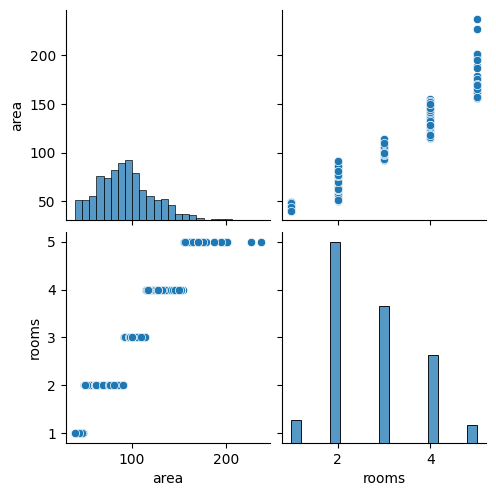

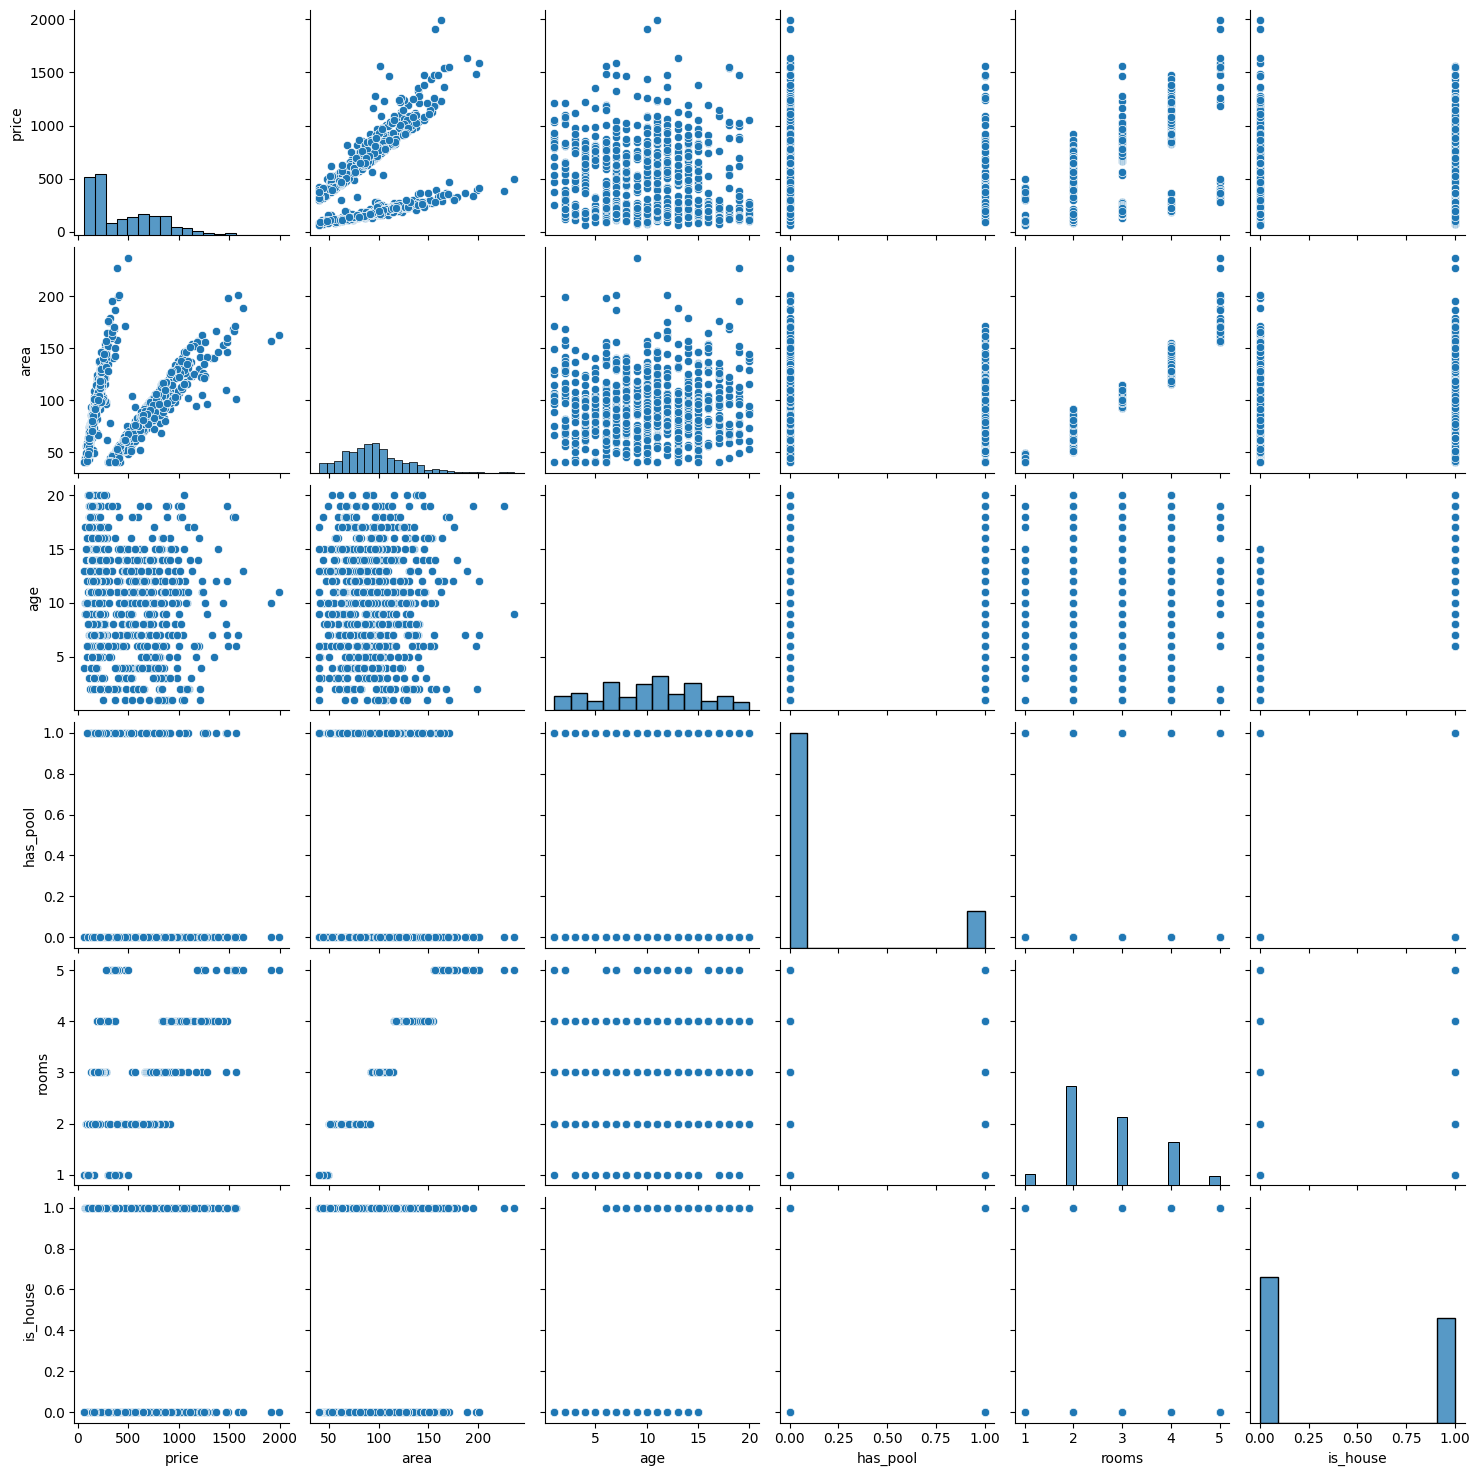

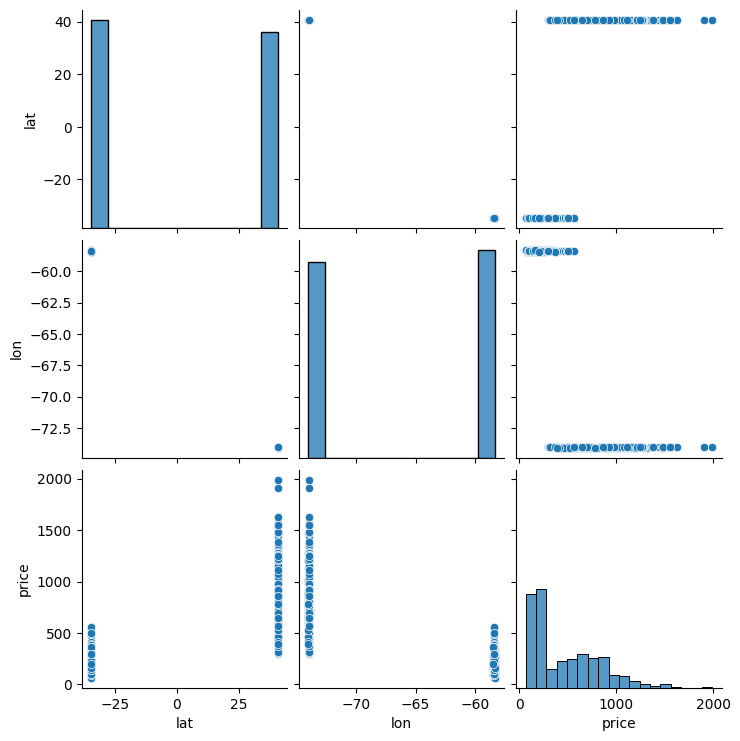

In [ ]:
#Realice una serie de histogramas y diagramas de dispersión (scatterplots) para mostrar la relación entre las variables.
#Para esto, es útil el comando pairplot. ¿Qué conclusiones puede extraer a simple vista acerca de las relaciones entre las variables?
#Se permite la creación de gráficos adicionales que considere relevantes.

import seaborn as sns
import matplotlib.pyplot as plt

# Crear un pairplot con las variables numéricas

sns.pairplot(df[["area", "rooms",]])
sns.pairplot(df[[ "price", "area", "age", "has_pool","rooms", "is_house"]])

sns.pairplot(df[["lat", "lon", "price"]])


"""# Scatterplot 2D con color según precio
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="lat", y="lon", hue="price", palette='coolwarm', alpha=0.7)

plt.xlabel("Latitud")
plt.ylabel("Longitud")
plt.title("Distribución de precios según Latitud y Longitud")
plt.show()
"""


In [ ]:
1.3


"""Divida el conjunto de desarrollo casas_dev.csv en un 80 % para entrenamiento (train)
y un 20 % para validación (validation). Estos conjuntos se utilizarán para entrenar y
validar los modelos que desarrollarán en las siguientes secciones. Se sugiere normalizar
los datos para lograr un mejora el condicionamiento numérico de los algortmos de
aprendizaje. Recuerde que si normaliza los datos, cuando haga una predicción deberá
invertir la normalización para volver a las escalas originales. Usar la libreria pandas con la funcion sample"""

#eliminar columna areea_units
df = df.drop("area_units", axis=1)

# Dividir el dataset en train y validation
train = df.sample(frac=0.8, random_state=42)
validation = df.drop(train.index)

# Normalizar los datos
train_mean = train.mean()
train_std = train.std()

train_norm = (train - train_mean) / train_std
validation_norm = (validation - train_mean) / train_std

# crear un archivo csv para train y validation dentro de la carpeta del proyecto

train_norm.to_csv("train.csv", index=False)
validation_norm.to_csv("validation.csv", index=False)








In [ ]:
#2)

#2.1)

"""implemente una clase de regresión lineal. El constructor deberá recibir X e y, y se
deberá incluir como métodos de entrenamiento de la clase: entrenamiento mediante
la pseudo-inversa y entrenamiento mediante descenso por gradiente. En ambos casos
se debe almacenar como atributo self.coef los coeficientes (pesos) resultantes de la
regresión.
NOTA: Asegúrese de que haya un método que permita imprimir los coeficientes con
los nombres de sus respectivas variables de forma prolija."
"""

class LinearRegression:
    def __init__(self, X, y):
        self.X = X
        self.y = y
        self.coef = None

    def fit_pseudo_inverse(self):
        self.coef = np.linalg.pinv(self.X.T @ self.X) @ self.X.T @ self.y

    def fit_gradient_descent(self, lr=0.01, epochs=1000):
        self.coef = np.zeros(self.X.shape[1])
        for _ in range(epochs):
            gradient = 2 * self.X.T @ (self.X @ self.coef - self.y)
            self.coef -= lr * gradient

    def predict(self, X):
        return X @ self.coef

    def print_coefs(self):
        for i, coef in enumerate(self.coef):
            print(f"{self.X.columns[i]}: {coef:.2f}")

    
#2.2)
#Implemente la función de pérdida utilizando el Error Cuadrático Medio (MSE)
def mse(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

#2.3)
#Verifique que su implementación de la regresión lineal funcione correctamente tanto
# para cuando se tiene una característica como para múltiples características.


# Cargar los datos de entrenamiento y validación
train = pd.read_csv("train.csv")
validation = pd.read_csv("validation.csv")

# Separar las columnas de características (X) y la variable objetivo (y)
X_train = train.drop("price", axis=1)
y_train = train["price"]
X_val = validation.drop("price", axis=1)
y_val = validation["price"]

# Agregar una columna de unos para el término independiente

X_train["intercept"] = 1
X_val["intercept"] = 1

# Crear y entrenar el modelo de regresión lineal con la pseudo-inversa
model_pinv = LinearRegression(X_train, y_train)
model_pinv.fit_pseudo_inverse()
y_pred_pinv = model_pinv.predict(X_val)
print("Coeficientes con la pseudo-inversa:")
model_pinv.print_coefs()
print("MSE con la pseudo-inversa:", mse(y_val, y_pred_pinv))

# Crear y entrenar el modelo de regresión lineal con descenso por gradiente
model_gd = LinearRegression(X_train, y_train)
model_gd.fit_gradient_descent()
y_pred_gd = model_gd.predict(X_val)
print("\nCoeficientes con descenso por gradiente:")
model_gd.print_coefs()
print("MSE con descenso por gradiente:", mse(y_val, y_pred_gd))



LinAlgError: SVD did not converge